# Chapter 4. 데이터 시각화
백 마디 말보다 그림을 사용하는 것이 낫다는 얘기가 있습니다. 수치적 데이터를 아무리 들이밀어도 이해가 안 되면 말짱 꽝이죠. 그렇기 때문에 수많은 문헌과 논문에서 수치적 데이터와 함께 그래프와 그림을 이용해 독자의 이해를 돕는 것입니다. 마찬가지로 파이썬이 데이터 분석의 주력 언어로 자리잡으면서 파이썬을 사용하는 데이터 분석가와 데이터 사이언티스트들을 뒷받침할 수 있는 데이터 시각화 툴이 많이 개발되었습니다.  
이번 장에서는 맷플롯립(Matplotlib)을 시작으로 시본(Seaborn)과 Plotly까지 현재 주력으로 사용되고 있는 시각화 툴을 소개하겠습니다. 목차는 아래와 같습니다.  

* 정적 2차원 플롯: 전형적인 2차원 그래프 및 플롯
* 정적 3차원 플롯: 금융 등 특정 분야에서 유용하게 쓰이는 3차원 플롯
* 상호작용형 2차원 플롯: 사용자의 동작에 반응하는 상호작용형 2차원 플롯

## 4.1 정적 2차원 플롯
모름지기 이과들에게 데이터 시각화는 숙명과도 같은 과제입니다. 제아무리 좋은 데이터가 나와도 보는 사람이 이해하지 못하면 그건 좋은 figure가 아닐 겁니다. 파이썬에서 이를 돕기 위해 나온 라이브러리 중 대표적인 사례가 바로 맷플롯립입니다.  
눈치 빠른 분들, 혹은 이전에 이미 파이썬을 중급 단계까지 써보셨던 분들은 이전 강의노트에서 넘파이 이외의 다른 라이브러리가 하나 더 임포트되어 있던 것을 보셨을 겁니다. 이 라이브러리는 오늘 다룰 맷플롯립의 하위 라이브러리인 pyplot으로, 웬만한 line, scatter 그래프나 히스토그램은 이 라이브러리를 이용해 그래프를 그릴 수 있습니다. 사실, 맷플롯립은 워낙 방대한 양의 메서드를 포괄하는 라이브러리이기 때문에 넘파이나 사이파이에서처럼 메서드를 하나하나 설명하기란 거의 불가능합니다. 그래서 일단 이번 강의노트에서는 과학/공학/데이터 분석에서 자주 쓰이는 그래프를 그리는 문법과 같이 실제 사례 위주로 강의노트를 진행하겠습니다.
> <span style='background-color:green'>Tips and Tricks</span></br>Matplotlib로도 충분히 좋은 그래프를 그릴 수 있지만, 논문 등에 넣을 그림에 흔히 쓰이는 폰트나 그리드 등의 특성을 일일이 다 구현하기에는 손이 많이 갑니다. 이런 생각을 한 게 한 둘이 아니었던지, 아예 이걸 라이브러리로 구현해놓은 사례가 있습니다. 바로 `scienceplots`라는 라이브러리입니다. pip로 설치해서 사용할 수 있으니 링크를 타고 들어가서 알아보시면 좋을 것 같습니다.  
[scienceplots](https://github.com/garrettj403/SciencePlots)

In [1]:
import matplotlib as mpl

In [2]:
import matplotlib.pyplot as plt # 메인 서브패키지를 plt라는 이름으로 임포트

In [3]:
mpl.rcParams['savefig.dpi'] = 300 # 플롯을 파일로 작성할 때 해상도 설정
mpl.rcParams['font.family'] = 'Malgun Gothic' # 모든 플롯의 폰트를 맑은 고딕으로 설정
mpl.rcParams['axes.unicode_minus'] = False # 한글 폰트에서 마이너스 기호가 깨지는 것을 막기 위해 설정 변경

### 4.1.1 맷플롯립 기초 - 2차원 선형 플롯
가장 기본적인 2차원 플롯 명령은 `plot()` 함수로 수행합니다. 이 함수는 두 가지 숫자 집합이 필요합니다.
* $x$값: $x$ 좌표(가로축)의 값을 담고 있는 배열이나 리스트
* $y$값: $y$ 좌표(세로축)의 값을 담고 있는 배열이나 리스트  

이 때, $x$값과 $y$값의 개수는 같아야 합니다.

In [4]:
import numpy as np

In [5]:
x = np.linspace(0,15,30)
y = np.sin(x) + 0.1 * np.random.randn(len(x))

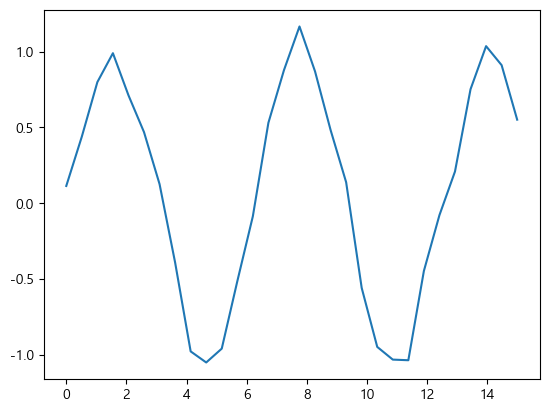

In [6]:
plt.plot(x, y)
plt.show()

만약 `plot` 함수의 인수로 `ndarray` 객체를 넘기는 경우에는 함수가 이를 감지하여 자동으로 처리하므로 $x$값에 대한 추가 정보를 제공하지 않아도 됩니다. 만약 $y$값만 있으면 인덱스값을 $x$값으로 사용합니다. 따라서 다음 한 줄짜리 코드도 앞의 코드와 같은 그림을 그려줍니다.  
> <span style='background-color:green'>Tips and Tricks</span></br>넘파이 `ndarray` 객체를 `matplotlib` 함수에 바로 넘길 수 있으며, 이때는 `ndarray` 객체에서 단순한 플롯을 위한 자료구조를 자동으로 파악할 수 있습니다. 하지만 너무 크거나 복잡한 배열을 인수로 사용하지 않도록 주의해야 합니다.  

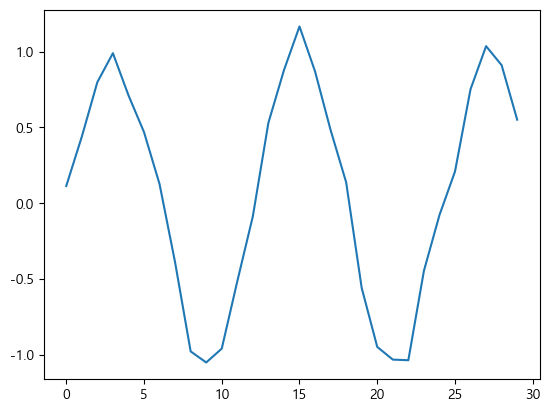

In [7]:
plt.plot(y)
plt.show()

이렇듯 `plot()` 함수를 쓰면 데이터를 구성하는 2차원 상의 점들을 이어서 선으로 만들어 출력합니다. 여기서 조금 더 눈에 잘 띄게 하기 위해, 또는 보고서나 출판물을 위한 요구조건을 맞추기 위해 몇 가지 옵션을 추가할 수 있습니다. 아래 예제에서는 각 포인트를 동그라미 마크로 표시하고 선은 보라색 점선으로 변경, 선의 굵기를 더 굵게 변경합니다.  
`plt.plot()` 함수에서는 다음 표와 같은 색깔 이름의 약자를 사용할 수 있습니다. 단, 색깔의 이름은 약자가 아니라 실제 영어 이름으로 입력할 수도 있습니다(맷플롯립이 그 색의 이름을 내장하고 있다는 가정 하에).  

|약자|색깔|
|---|---|
|`b`|파란색|
|`g`|초록색|
|`r`|빨간색|
|`c`|청록색(cyan)|
|`m`|자홍색(magenta)|
|`y`|노란색|
|`k`|검은색|
|`w`|흰색|  

`plt.plot()` 함수에서 선과 점의 스타일은 아래 표에 정리된 기호를 사용해 표시합니다.  

|글자|표시|
|---|---|
|`-`|실선|
|`--`|대시선|
|`-.`|대시-점선|
|`:`|점선|
|`.`|점|
|`,`|픽셀|
|`o`|원|
|`v`|아래쪽 삼각형|
|`^`|위쪽 삼각형|
|`<`|왼쪽 삼각형|
|`>`|오른쪽 삼각형|
|`1`|아래쪽 삼각형|
|`2`|위쪽 삼각형|
|`3`|왼쪽 삼각형|
|`4`|오른쪽 삼각형|
|`s`|사각형|
|`p`|오각형|
|`*`|별|
|`h`|육각형 1|
|`H`|육각형 2|
|`+`|덧셈 기호|
|`x`|곱셈 기호|
|`D`|다이아몬드|
|`d`|가는 다이아몬드|
|`\|`|브이라인(Vline)|
|`_`|에이치라인(Hline)|  

색깔 약자와 점/선 스타일 기호의 조합도 가능합니다. 이런 방식으로 표시하면 여러 개의 다른 자료들을 잘 구별할 수 있습니다. 나중에 보겠지만 이렇게 지정된 플롯 스타일은 범례(legend)에도 반영됩니다.


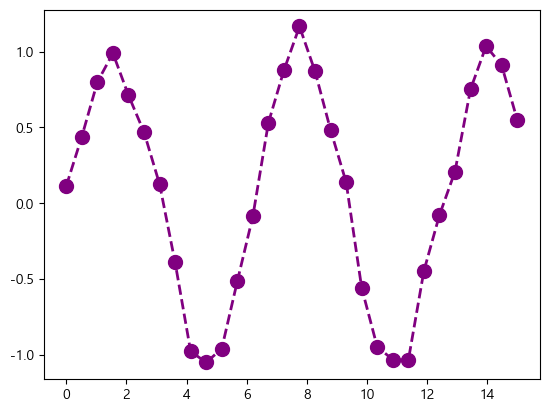

In [8]:
plt.plot(x,y, 'o--', color='purple', lw=2, ms=10) # ms 또는 markersize: 마커의 크기를 지정하는 키워드
plt.show()

그런가 하면, 아예 출력되는 figure의 크기를 지정할 수도 있습니다. `figure()` 메서드는 그림이 그려지는 figure 객체를 생성합니다. 이때, 생성되는 객체의 가로 세로 길이를 부여함으로써 크기를 조절할 수 있습니다.

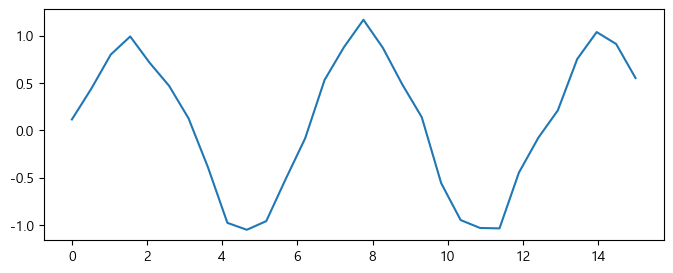

In [9]:
plt.figure(figsize=(8, 3))
plt.plot(x, y)
plt.show()

기껏 그림을 그려도 각 축이 어떤 데이터를 나타내는지, 더 나아가 그 그래프가 어떤 관계를 나타내는지 알아볼 수 없다면 그 그래프는 의미없는 정보가 됩니다. `xlabel()`과 `ylabel()` 함수를 이용해 각 축의 정보를 표시할 수 있습니다. `title()` 메서드로는 그래프의 제목을 표시할 수 있습니다. 이 세 가지 메서드는 공통적으로 `fontsize`라는 키워드로 글씨 크기를 키우거나 줄일 수 있습니다.

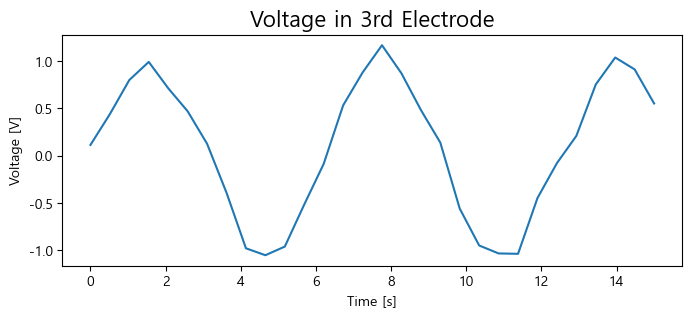

In [10]:
plt.figure(figsize=(8,3))
plt.plot(x,y)
plt.xlabel('Time [s]')
plt.ylabel('Voltage [V]')
plt.title('Voltage in 3rd Electrode', fontsize=16)
plt.show()

하나의 플롯에 여러 개의 선을 그리기는 쉽습니다. 단순히 `plot()` 메서드를 여러 번 호출하면 됩니다.

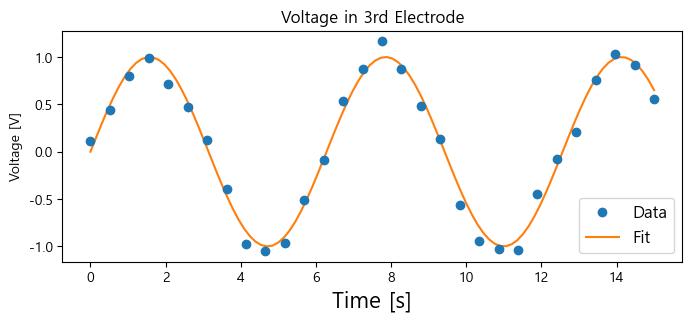

In [11]:
x2 = np.linspace(0, 15, 100)
y2 = np.sin(x2)

plt.figure(figsize=(8,3))
plt.plot(x,y, 'o', label='Data', zorder=100)
plt.plot(x2,y2, label='Fit')
plt.xlabel('Time [s]', fontsize=16)
plt.ylabel('Voltage [V]')
plt.title('Voltage in 3rd Electrode')
plt.legend(loc='lower right', fontsize=12)
plt.show()

때로는 보고자 하는 $x$와 $y$ 범위가 제한적이어서 그 범위에 한해서만 플롯을 시켜야 할 때도 있습니다. 이 때는 몇 가지 방법이 있는데, `plt.axis()` 함수로 전체 그래프의 축척을 조정하는 방법입니다.

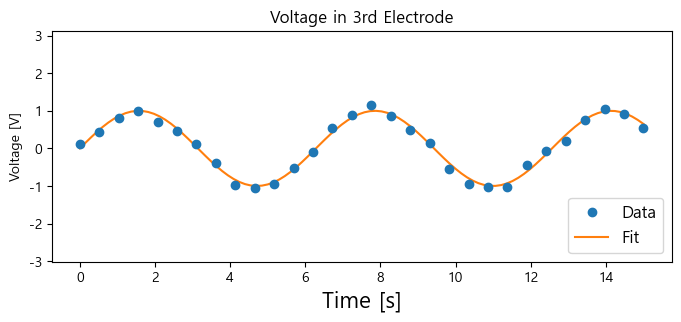

In [12]:
plt.figure(figsize=(8,3))
plt.plot(x,y, 'o', label='Data', zorder=100)
plt.plot(x2,y2, label='Fit')
plt.xlabel('Time [s]', fontsize=16)
plt.ylabel('Voltage [V]')
plt.title('Voltage in 3rd Electrode')
plt.legend(loc='lower right', fontsize=12)
plt.axis('equal')
plt.show()

`plt.axis()`의 다른 옵션을 표에 정리하면 다음과 같습니다. 대부분은 문자열 인수로 넘겨야 합니다.  

|인수|설명|
|---|---|
|인수가 없는 경우|현재 축의 한계값을 반환|
|`off`|축 선과 레이블을 없앰|
|`equal`|가로축과 세로축의 스케일을 같게 함|
|`scaled`|가로축과 세로축의 스케일이 같아지도록 크기 자체를 조정|
|`tight`|모든 자료가 보이도록 축 범위를 조밀하게 조정|
|`image`|모든 자료가 보이도록 축 범위를 자료의 극한값으로 조정|
|`[xmin, xmax, ymin, ymax]`|주어진 리스트값으로 축 범위 조정|  

또한 `plt.xlim()` 함수와 `plt.ylim()` 함수를 사용하면 가로축과 세로축의 범위를 직접 설정할 수 있습니다. 이 때는 `xlim()` 또는 `ylim()` 메서드로 범위를 제한시킵니다.

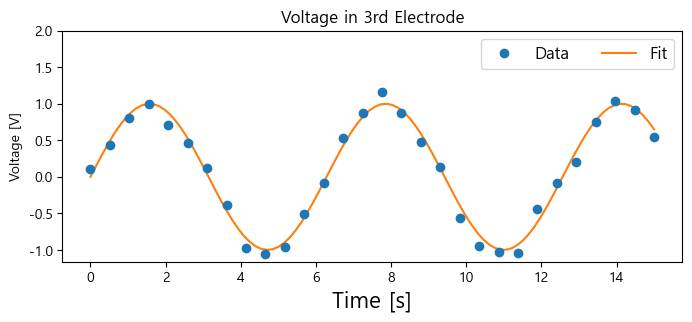

In [13]:
plt.figure(figsize=(8,3))
plt.plot(x,y, 'o', label='Data', zorder=100)
plt.plot(x2,y2, label='Fit')
plt.xlabel('Time [s]', fontsize=16)
plt.ylabel('Voltage [V]')
plt.title('Voltage in 3rd Electrode')
plt.legend(loc='upper right', fontsize=12, ncol=2)
plt.ylim(top=2)
plt.show()

### 4.1.2 맷플롯립 응용 - 축 공유, 서브플롯
일반적으로 데이터 집합은 여러 개로 분리된 하위 자료들의 모음으로 이루어져 있습니다. 이러한 데이터 집합을 다룰 때는 몇 가지 추가적인 고려를 해야 할 때도 있습니다. 예를 들어 두 개의 데이터 집합이 같은 $x$축 혹은 $y$축 축척을 쓸 수 없을 수도 있습니다. 또 다른 예는 두 개의 자료를 서로 다른 방법으로, 예를 들어 하나는 선 플롯으로 그리고 다른 하나는 막대 플롯으로 시각화하고 싶은 경우입니다.  
다음은 표준정규분포를 가지는 $20\times 2$ 크기의 의사 난수를 `ndarray`로 생성하는 코드입니다. 생성된 배열에 대해 `cumsum()` 메서드를 호출하면 0번 축(첫 번째 차원)을 따라 누적합계를 구합니다.

In [14]:
y = np.random.standard_normal((20, 2)).cumsum(axis=0)

일반적으로 `plt.plot()`에는 2차원 배열도 인수로 넘길 수 있습니다. 이 명령은 자동으로 자료를 분석하여 담겨진 자료를 1번 축, 즉 두 번째 차원을 따라 두 개로 분리하고 그려줍니다.

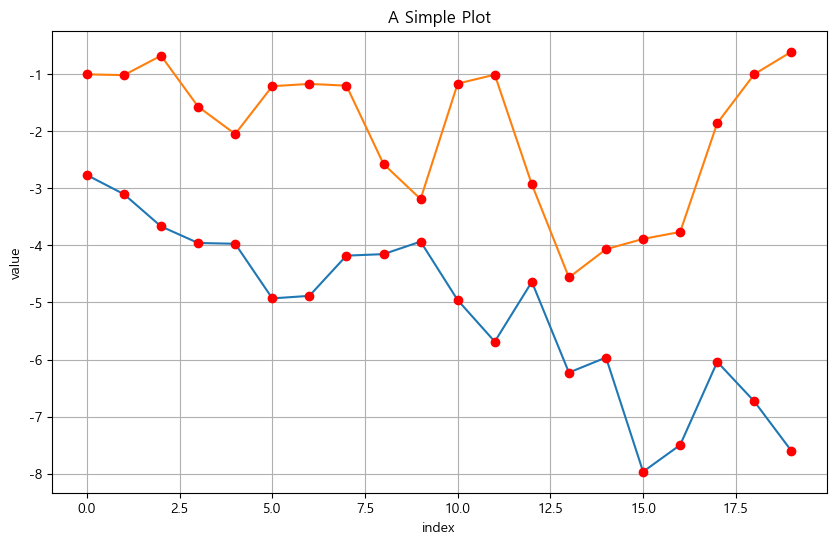

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(y, lw=1.5)
plt.plot(y, 'ro')
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot')
plt.grid() # 격자선을 표시하는 메서드
plt.show()

이 경우 가독성을 높이기 위해 추가로 주석 기호(annotation)를 달 수도 있습니다. 각 자료에 레이블을 붙이고 범례에 이를 나열할 수 있습니다. `plt.legend()` 함수는 범례의 위치를 지정하는 인수를 받습니다. 인수의 값이 0이면 범례에 의해 가려져서 보이지 않는 자료의 수가 최소가 되도록 최적의 범례 위치를 자동으로 계산합니다. 다음 그림에서는 두 개의 자료를 범례와 같이 표시했습니다. 생성하는 코드에서는 `ndarray` 객체를 한꺼번에 넘기지 않고 `y[:, 0]`, `y[:,1]`과 같이 분리하여 레이블을 붙였습니다.

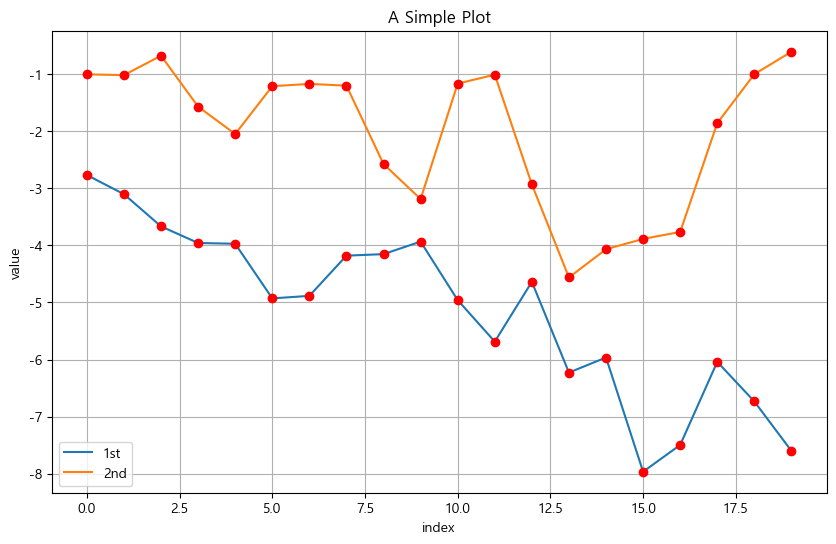

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(y[:, 0], lw=1.5, label='1st')
plt.plot(y[:, 1], lw=1.5, label='2nd')
plt.plot(y, 'ro')
plt.legend(loc=0)
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot')
plt.grid()
plt.show()

`plt.legend()`의 추가 위치 인수를 아래 표에 표시했습니다.  

|`loc` 인수|설명|
|---|---|
|기본값|오른쪽 위|
|`0`|가능한 최적의 위치|
|`1`|오른쪽 위|
|`2`|왼쪽 위|
|`3`|왼쪽 아래|
|`4`|오른쪽 아래|
|`5`|오른쪽|
|`6`|왼쪽 중앙|
|`7`|오른쪽 중앙|
|`8`|중앙 아래|
|`9`|중앙 위|
|`10`|중앙|  

동일한 금융 위험 요인을 여러 번 시뮬레이션하는 경우와 같이 비슷한 크기의 여러 데이터를 그릴 때는 하나의 $y$축을 써도 되지만, 크기가 전혀 다른 여러 데이터를 그릴 때는 하나의 $y$축만 써서는 시각적인 정보를 제대로 표시하기 어렵습니다. 예를 들어 위의 예제에서 데이터 하나를 100배 더 크게 하여 다시 그려보겠습니다.

In [17]:
y[:, 0] = y[:, 0] * 100

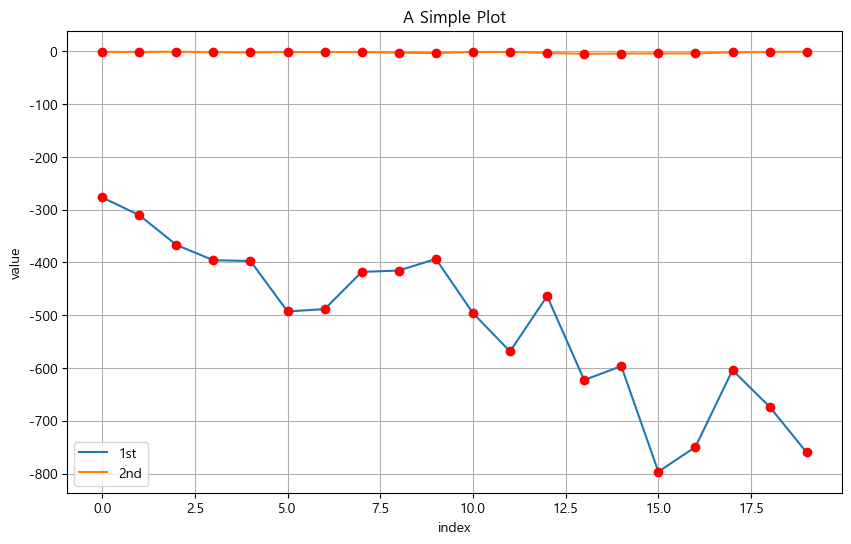

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(y[:, 0], lw=1.5, label='1st')
plt.plot(y[:, 1], lw=1.5, label='2nd')
plt.plot(y, 'ro')
plt.legend(loc=0)
plt.xlabel('index')
plt.ylabel('value')
plt.title('A Simple Plot')
plt.grid()
plt.show()

위 그림을 보면 알 수 있듯이 첫 번째 데이터는 시각적으로 읽을 만하지만 두 번째 데이터는 축척으로 인해 거의 직선으로 보입니다. 다시 말해 두 번째 데이터의 정보는 '시각적으로 손실'된 상태입니다. 스케일링을 통해 데이터를 재조정하지 않고 이 문제를 해결하는 두 가지 방법이 있습니다.  
* 두 개의 $y$축을 사용하는 방법 (좌/우)
* 두 개의 서브플롯(subplot)을 사용하는 방법 (좌/우 혹은 상/하)

우선 $y$축을 하나 더 사용하는 경우를 소개합니다. 아래 그림을 보면 $y$축이 두 개입니다. 왼쪽은 첫 번째 자료를 위한 것이고, 오른쪽의 축이 두 번째 데이터를 위한 것입니다. 범례는 두 개가 존재하게 됩니다.

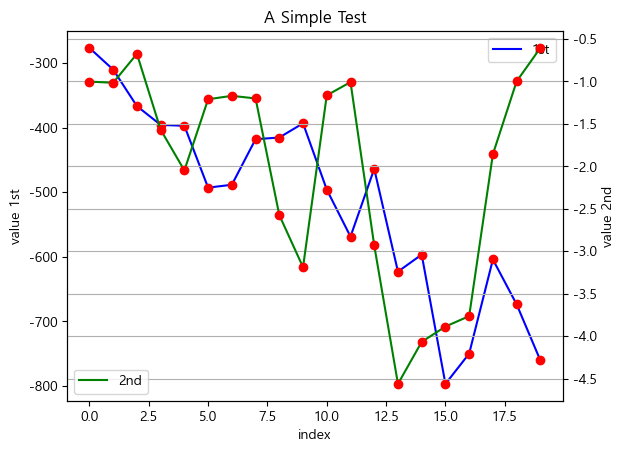

In [19]:
fig, ax1 = plt.subplots() # figure 객체와 axis 객체 정의
plt.plot(y[:, 0], 'b', lw=1.5, label='1st')
plt.plot(y[:, 0], 'ro')
plt.legend(loc=0)
plt.xlabel('index')
plt.ylabel('value 1st')
plt.title('A Simple Test')

ax2 = ax1.twinx() # x축을 공유하는 두 번째 axis 객체를 생성합니다
plt.plot(y[:, 1], 'g', lw=1.5, label='2nd')
plt.plot(y[:, 1], 'ro')
plt.legend(loc=0)
plt.ylabel('value 2nd')
plt.grid()
plt.show()

이 코드에서 중요한 부분은 축(axis)을 다루는 부분입니다. 다음이 중요한 코드입니다.  
```Python
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
```  
`plt.subplots()` 함수를 사용하면 `figure`나 `subplot` 등의 하부 플롯 객체에 직접 접근할 수 있습니다. 이를 이용하면 첫 번째 서브플롯과 $x$축을 공유하는 두 번째 서브플롯을 생성할 수 있습니다. 위 그림이 그 두 서브플롯을 겹쳐서 그린 것이죠.  

---------------------------
이제 두 서브플롯을 구분하는 경우를 생각해보겠습니다. 이 방식은 아래 그림에서 볼 수 있듯이 두 개의 자료를 다루는 데 있어 자유도를 높여줍니다.

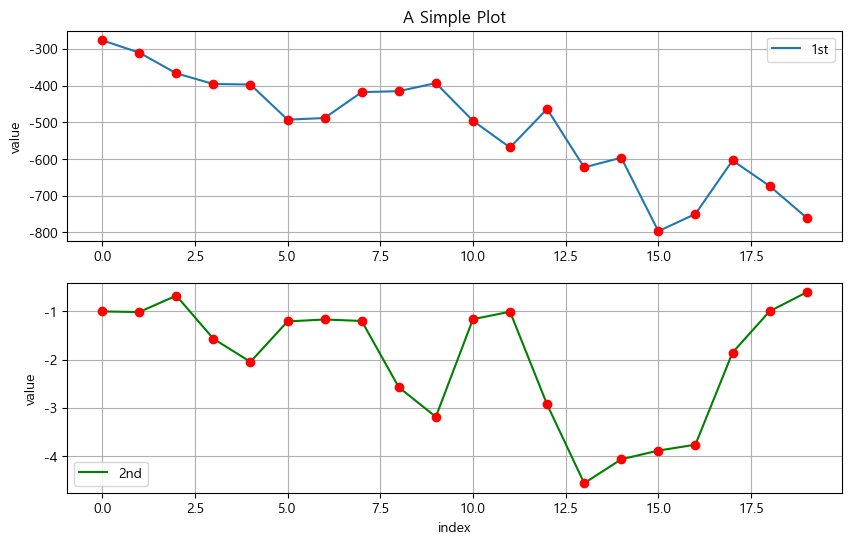

In [20]:
plt.figure(figsize=(10, 6))
plt.subplot(211) # 위쪽 서브플롯 1을 정의합니다((2, 1, 1)로 쓸 수도 있습니다)
plt.plot(y[:, 0], lw=1.5, label='1st')
plt.plot(y[:, 0], 'ro')
plt.legend(loc=0)
plt.ylabel('value')
plt.title('A Simple Plot')
plt.grid()
plt.subplot(212) # 아래쪽 서브플롯 2를 정의합니다((2, 1, 2)로 쓸 수도 있습니다)
plt.plot(y[:, 1], 'g', lw=1.5, label='2nd')
plt.plot(y[:, 1], 'ro')
plt.legend(loc=0)
plt.xlabel('index')
plt.ylabel('value')
plt.grid()
plt.show()

`figure` 객체에 서브플롯을 넣으려면 특별한 좌표 시스템을 사용해야 합니다. `plt.subplots()` 함수는 `numrows`, `numcols`, `fignum`이라는 3개의 숫자를 인수로 받습니다(세 숫자는 쉼표로 분리해도 되고 그냥 붙여 써도 됩니다). `numrows`는 행(row)의 수, `numcols`는 열(column)의 수, `fignum`은 그 중 몇 번째 서브플롯인지를 표시하는 수입니다. 서브플롯은 1부터 `numrows` $\times$ `numcols`까지의 수로 표시합니다. 예를 들어 행과 열이 3개인 9개의 크기가 같은 서브플롯을 가진 그림에서 오른쪽 아래의 서브플롯은 `plt.subplot(3, 3, 9)`로 표시할 수 있습니다.  
가끔 자료를 시각화하기 위해 두 개의 서로 다른 플롯 형식을 선택해야 할 때가 있습니다. 서브플롯 방식을 사용하면 맷플롯립 라이브러리가 제공하는 다양한 플롯 유형을 임의로 선택하여 조합할 수 있습니다.  
아래 그림은 선/포인트 플롯과 바 차트를 결합했습니다.

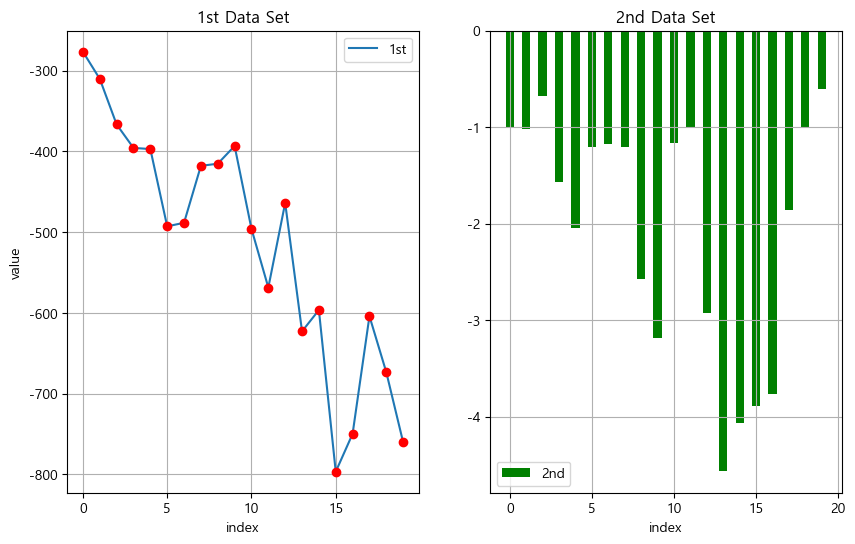

In [21]:
plt.figure(figsize=(10, 6))
plt.subplot(121)
plt.plot(y[:, 0], lw=1.5, label='1st')
plt.plot(y[:, 0], 'ro')
plt.legend(loc=0)
plt.xlabel('index')
plt.ylabel('value')
plt.title('1st Data Set')
plt.grid()
plt.subplot(122)
plt.bar(np.arange(len(y)), y[:, 1], width=0.5,
        color='g', label='2nd') # 바 차트 생성
plt.legend(loc=0)
plt.xlabel('index')
plt.title('2nd Data Set')
plt.grid()
plt.show()

### 4.1.3 기타 플롯 유형
데이터를 다루는 분야에서는 선형 플롯 외에도 유용하게 사용되는 다른 시각화 방법들이 있습니다.  
#### 4.1.3.1 산점도
첫번째는 산점도(스캐터플롯, scatter plot)로 데이터 값 중 하나를 $x$값으로, 다른 값을 그에 대응하는 $y$값으로 간주하여 2차원 좌표평면 상에 점을 찍습니다. 산점도를 찍는 방식은 두 가지가 있는데, 그 중 하나는 `plot()` 메서드에 `'ro'` 키워드를 부여해 선이 아닌 점으로 그리는 방식입니다. 두 개의 금융 시계열 데이터 수익률을 동시에 보일 때 사용할 수 있습니다. 예제를 위해 산점도 용 자료를 다시 생성합니다.

In [22]:
y = np.random.standard_normal((1000, 2))

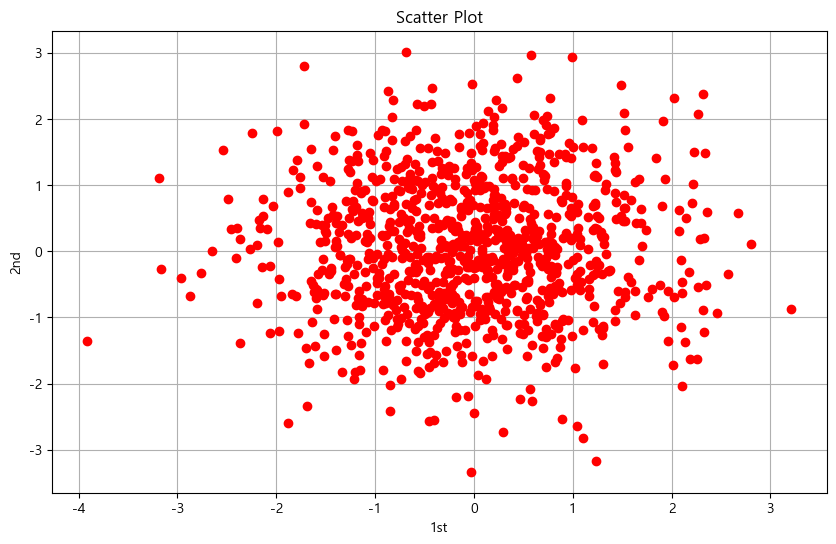

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(y[:, 0], y[:, 1], 'ro')
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot')
plt.grid()
plt.show()

두 번째 방법. 맷플롯립 라이브러리는 산점도를 위한 별도의 `scatter()` 함수도 제공합니다. 이 함수는 `plot` 함수와 기본적인 사용법이 같지만 몇 가지 추가적인 기능을 제공합니다.

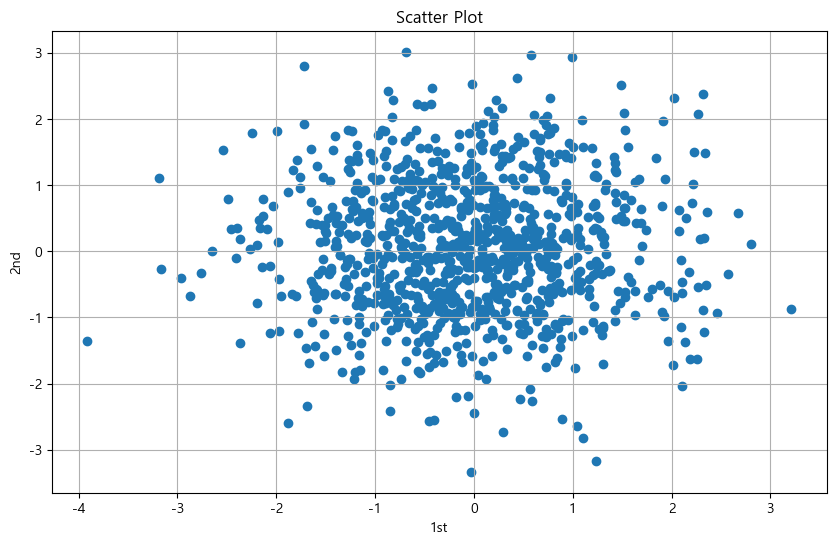

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(y[:, 0], y[:, 1], marker='o')
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot')
plt.grid()
plt.show()

예를 들어 `scatter` 함수는 세 번째 차원을 추가할 수 있는데 이 값은 여러 가지 색을 사용하여 시각화할 수 있으며 색이 의미하는 값은 컬러바(colorbar)로 설명합니다. 다음 그림은 서로 다른 색상으로 세 번째 차원을 묘사하는 스캐터플롯을 보이고 있습니다. 이를 위해 0부터 10 사이의 정수를 가지는 세 번째 데이터를 임의로 생성했습니다.

In [25]:
c = np.random.randint(0, 10, len(y))

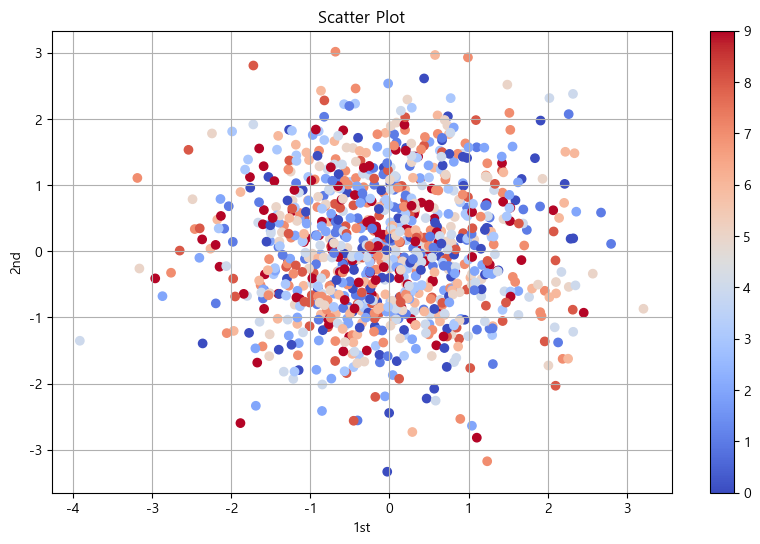

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(y[:, 0], y[:, 1], c=c, # 세 번째 데이터 포함
            cmap='coolwarm', # 컬러맵
            marker='o') # 굵은 점 마커
plt.colorbar()
plt.xlabel('1st')
plt.ylabel('2nd')
plt.title('Scatter Plot')
plt.grid()
plt.show()

#### 4.1.3.2 히스토그램
히스토그램(histogram)은 주로 금융자산 수익률 등의 데이터를 나타내는 데 사용됩니다. 두 자료의 빈도를 같은 플롯에 붙여서 표시해보겠습니다.

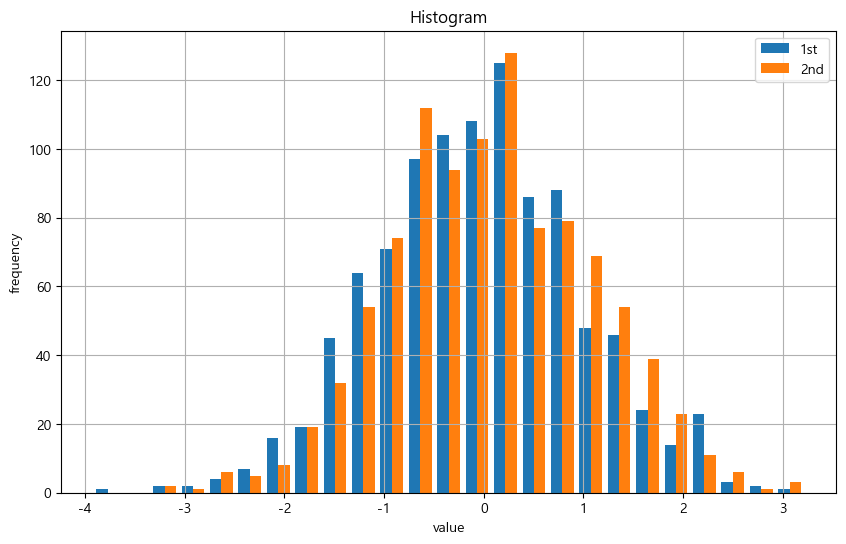

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(y, label=['1st', '2nd'], bins=25)
plt.legend(loc=0)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Histogram')
plt.grid()
plt.show()

히스토그램은 특히 사회과학과 금융 분야에서 중요한 플롯 유형이므로 `plt.hist()` 함수에 대해 좀 더 자세히 살펴보도록 하겠습니다. 맷플롯립 공식 문서에 따르면, 이 함수에는 다음과 같은 인수가 지원됩니다.  
```Python
plt.hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
```  
아래 표에서 주요 인수를 설명합니다.  

|인수|설명|
|---|---|
|`x`|리스트 객체 혹은 `ndarray` 객체|
|`bins`|빈도 구분값의 개수 ~~한마디로 기둥의 개수~~|
|`range`|빈도 구분값의 위아래 범위|
|`normed`|전체 값의 합이 1이 되도록 정규화하는지의 여부|
|`weights`|`x`값에 대한 가중치|
|`cumulative`|각 빈도 구분값이 하위 빈도 구분값을 누적하는지의 여부|
|`histtype`|옵션(문자열): `bar`, `barstacked`, `step`, `stepfilled`|
|`align`|옵션(문자열): `left`, `mid`, `right`|
|`orientation`|옵션(문자열): `horizontal`, `vertical`|
|`rwidth`|각 막대의 상대적인 폭|
|`log`|로그 스케일|
|`color`|각 자료의 색|
|`label`|레이블로 사용되는 문자열 혹은 문자열의 목록|
|`stacked`|여러 개의 자료를 쌓아올려서 표시하는지의 여부|  

다음 그림에도 비슷한 플롯을 표시했습니다. 근데 이제 두 자료를 히스토그램이 쌓아올린...

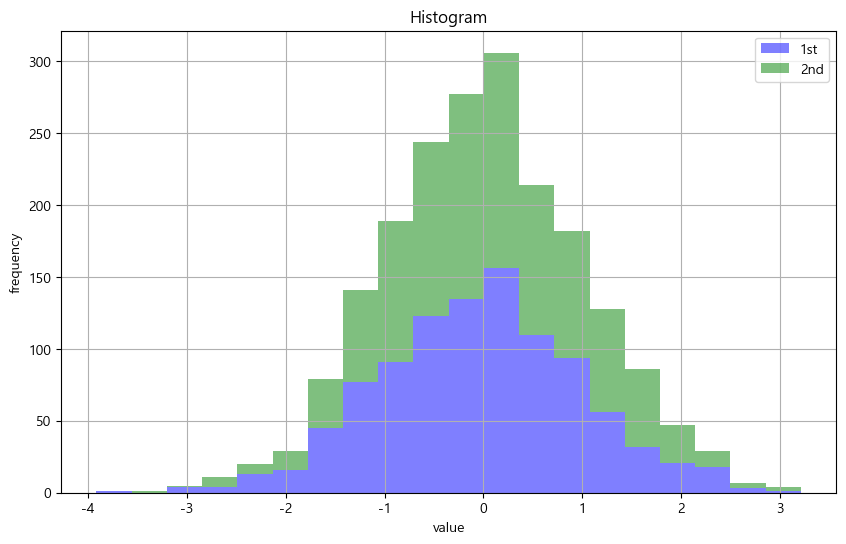

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(y, label=['1st', '2nd'], color=['b', 'g'],
         stacked=True, bins=20, alpha=0.5)
plt.legend(loc=0)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Histogram')
plt.grid()
plt.show()

한 가지 트릭으로, 확률/통계를 중점적으로 다루는 분야를 위해 이를 확률밀도함수(probability density function) 형태로 바꾸는 옵션이 있습니다. `density=True` 인수를 부여하면 됩니다.

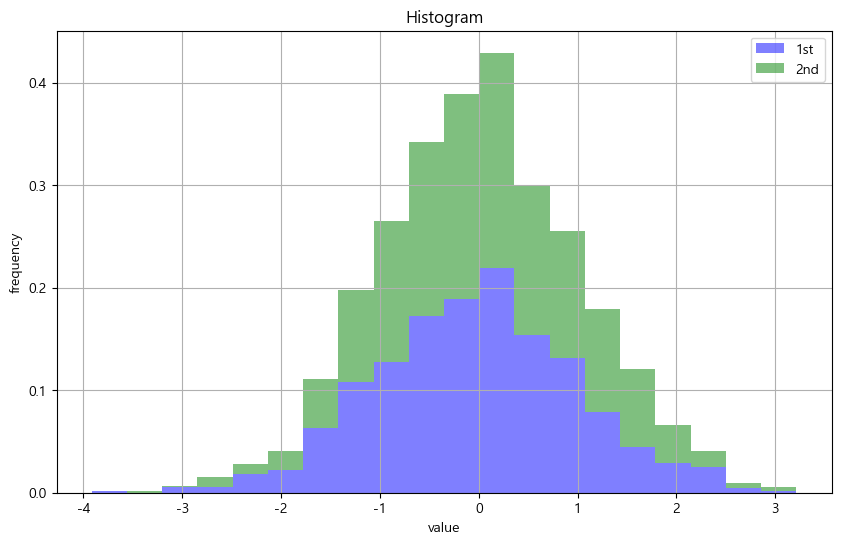

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(y, label=['1st', '2nd'], color=['b', 'g'],
         stacked=True, bins=20, alpha=0.5, density=True)
plt.legend(loc=0)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Histogram')
plt.grid()
plt.show()

간혹 히스토그램의 안쪽을 색칠하지 않고 외곽선만 나타내는 옵션을 사용해야 할 수도 있습니다. `histtype='step'`으로 부여하면 됩니다.

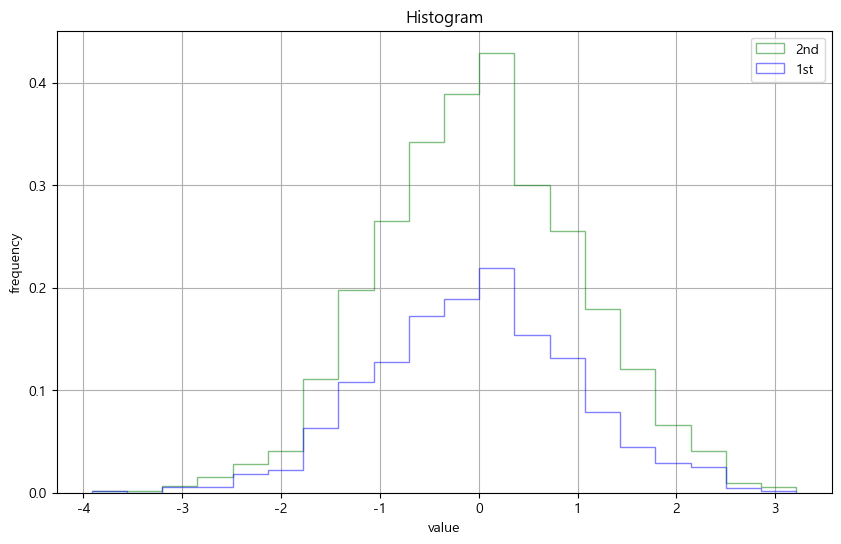

In [30]:
plt.figure(figsize=(10, 6))
plt.hist(y, label=['1st', '2nd'], color=['b', 'g'],
         stacked=True, bins=20, alpha=0.5, density=True,
         histtype='step')
plt.legend(loc=0)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('Histogram')
plt.grid()
plt.show()

#### 4.1.3.3 박스 플롯(boxplot)
박스 플롯은 히스토그램과 비슷하지만, 많은 데이터 집함의 특성을 동시에 정확하게 나타낼 수 있습니다. 특히, 데이터의 사분위수와 그 범위를 넘어서는 이상치(outlier)를 포착하는 데 특화된 플롯입니다.

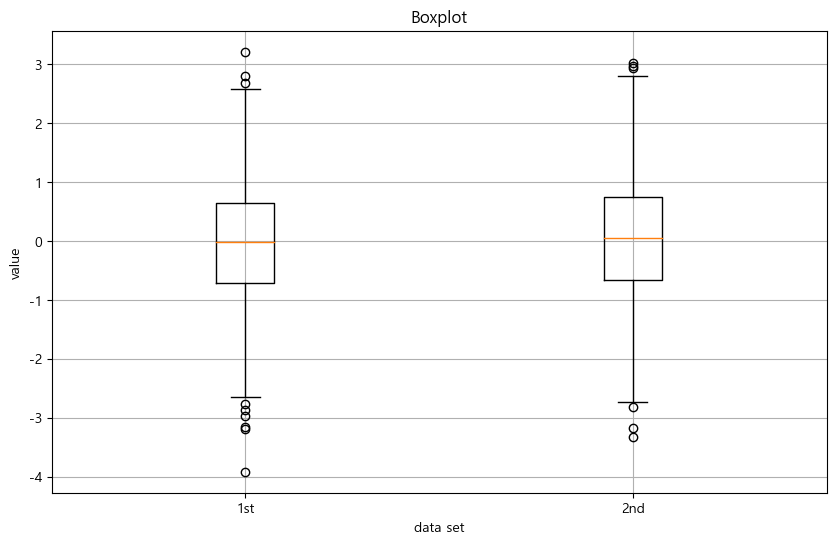

In [31]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.boxplot(y)
plt.setp(ax, xticklabels=['1st', '2nd']) # 개별 x 레이블 설정
plt.xlabel('data set')
plt.ylabel('value')
plt.title('Boxplot')
plt.grid()
plt.show()

위 코드에서 `setp` 함수는 플롯 객체의 속성을 설정하는 함수입니다. 예를 들어 다음과 같인 라인 플롯이 있다고 해보죠.  
```Python
line = plt.plot(data, 'r')
```  
이때 다음과 같은 코드를 이용하면 라인 스타일을 점선(dashed)으로 변경할 수 있습니다.  
```Python
plt.setp(line, linestyle='--')
```
이렇게 하면 플롯 객체(맷플롯립에서는 아티스트(artist) 객체라고 합니다)가 이미 생성된 이후에도 속성을 쉽게 변경할 수 있습니다.  

#### 4.1.3.4 2D 플롯
다양한 분야의 데이터를 만지다 보면, 마치 이미지 파일의 픽셀처럼 2차원 평면 전체에 걸쳐 분포된 데이터를 플롯해야 할 때가 있습니다. 이 때 사용하는 메서드는 `contourf()`로, 한국어로 직역하면 등고선 그래프라고 합니다. 마치 산을 나타낸 지도에서 등고선에 따라 고도를 나누고, 그 사이를 서로 다른 색상으로 칠해서 고도를 나타내는 것에서 착안한 플롯 방식입니다. 하지만, 이 방식은 2차원 좌표평면 상의 모든 점에 데이터가 분포되어 있어야 하기 때문에, 먼저 `np.meshgrid()`라는 메서드로 직사각형 격자를 만든 후 그려보겠습니다.

In [32]:
_ = np.linspace(-1, 1, 100)
x, y = np.meshgrid(_,_)
z = x**2+x*y

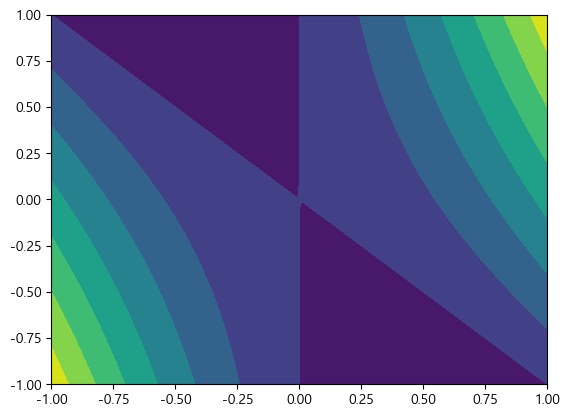

In [33]:
plt.contourf(x,y,z)
plt.show()

위에서 보듯이, `contourf()` 메서드는 격자 그리드의 좌표 `x`, `y`와 각각의 좌표에서의 함수값 `z`의 값을 인수로 받습니다. 이렇게 하면 좌표평면 상의 모든 포인트에서의 `z` 값을 마치 높낮이를 가진 것처럼 나타낼 수 있습니다.  
여느 메서드가 그렇듯 이 메서드도 여러 가지 인수를 가지고 있습니다. `levels` 인수를 바꾸면 조금 더 촘촘하게 등고선을 배치할 수 있습니다.
* https://matplotlib.org/stable/tutorials/colors/colormaps.html#sphx-glr-tutorials-colors-colormaps-py  

`vmin`과 `vmax` 인수로 색의 범위를 제어할 수 있습니다.
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contour.html

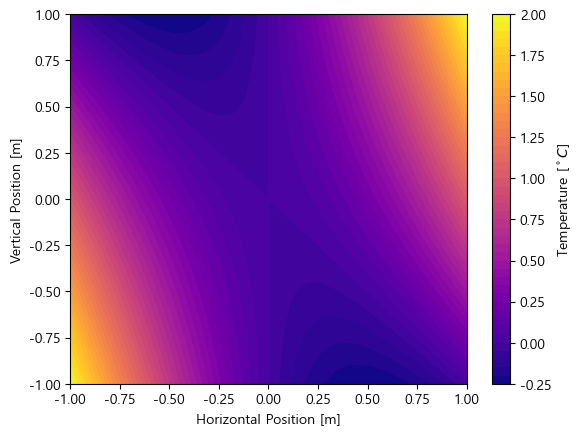

In [34]:
plt.contourf(x,y,z, levels=50, cmap='plasma')
plt.colorbar(label='Temperature [$^\circ C$]')
plt.xlabel('Horizontal Position [m]')
plt.ylabel('Vertical Position [m]')
plt.show()

어떤 상황에는 색 대신 선만 표시하는 것이 좋을 때가 있습니다.

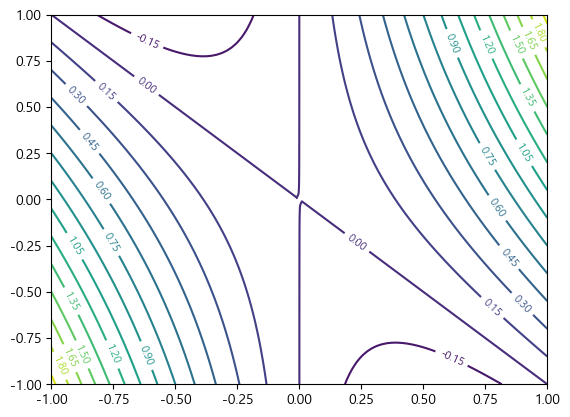

In [35]:
cs = plt.contour(x,y,z, levels=20)
plt.clabel(cs, fontsize=8)
plt.show()

#### 4.1.3.5 수학 예제
이 절에서 소개할 마지막 예제는 맷플롯립 갤러리에 있는 예제로 수학과 관련된 플롯입니다. 이 플롯은 함수의 상한과 하한 사이의 면적이 해당 함수의 정적분값과 같다는 것을 설명합니다. 예로 든 적분은 $\int_{\frac{1}{2}}^{\frac{3}{2}}\left(\frac{1}{2}e^x+1\right)\mathrm{d}x$입니다.  
아래 그림은 플롯 결과와 함께 맷플롯립에서 수학식을 플롯에 포함시키기 위해 레이텍(LaTeX)을 사용할 수 있음을 보여줍니다.  
아래 코드를 하나씩 살펴보죠. 우선 적분하려는 함수와 적분 구간을 정의합니다.

In [36]:
def func(x):
    return 0.5 * np.exp(x) + 1

a, b = 1/2, 3/2 # 적분 구간
x = np.linspace(0, 2) # 함수를 그릴 x값
y = func(x) # 함수를 그릴 y값
Ix = np.linspace(a, b) # 적분 구간의 x값
Iy = func(Ix) # 적분 구간의 y값
verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)] # 다각형 그림 좌표를 나타내는 튜플 객체의 리스트

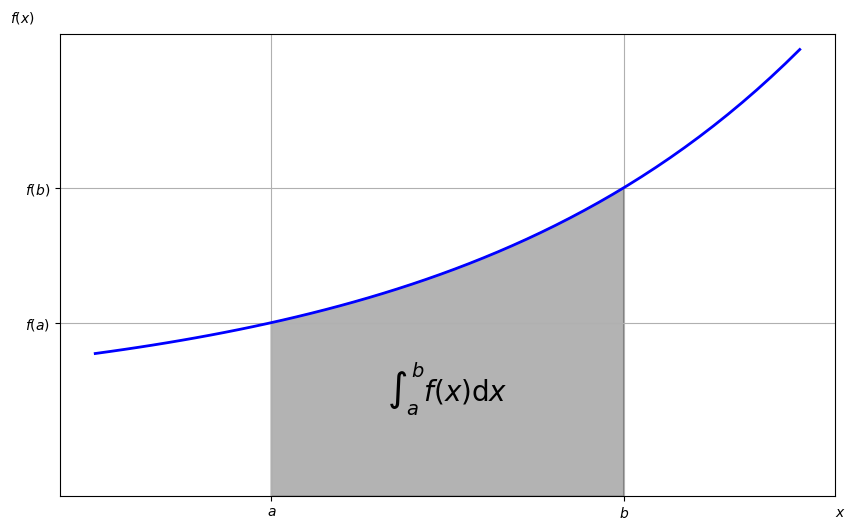

In [37]:
from matplotlib.patches import Polygon
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(x, y, 'b', lw=2)
plt.ylim(bottom=0)
poly = Polygon(verts, facecolor='0.7', edgecolor='0.5')
ax.add_patch(poly) # 적분 영역을 회색 다각형으로 그립니다
plt.text(0.5 * (a + b), 1, r'$\int_a^b f(x)\mathrm{d}x$',
         horizontalalignment='center', fontsize=20) # 플롯 내부에 적분 공식 추가
plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, r'$f\left(x\right)$')
ax.set_xticks((a, b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([func(a), func(b)])
ax.set_yticklabels(('$f(a)$', '$f(b)$'))
plt.grid()
plt.show()

#### 4.1.4 매운 맛 예제들
실무에서 맞닥뜨릴 수도 있는 복잡한 예제들을 몇 가지 소개하고자 합니다. 축 레이블에 복잡한 수식을 넣는 예제, 여러 개의 서브플롯 중 2가지를 채우는 예제, 눈금의 간격을 작게 하는 예제, 그리고 종합선물세트 되겠습니다.  
이 예제들에서 주목할 것은 `subplots()` 메서드가 반환하는 `fig`와 `ax`라는 객체입니다. `fig`는 `figure()` 메서드에서도 생성되는 객체로, 그래프를 그릴 공간(종이)에 해당합니다. `ax`(또는 `axes`)는 그 공간 중 지금 내가 사용할 부분을 가리키는 말입니다. 서브플롯을 여러 개 사용해야 할 경우에는 `ax = axes[0]`과 같이 여러 `ax`를 왔다갔다 하면서 각 서브플롯의 눈금, 제목 등을 다르게 설정하는 것이 더 깔끔하고 안전하게 플롯을 그릴 수 있는 방법입니다. 또한, `ax`를 지정하면서 코드를 생성해야만 구현할 수 있는 기능들도 있기 때문에, 이 예제들을 보면서 사용 방법을 조금이나마 익히고 갈 수 있으면 좋겠습니다.
> Matplotlib의 더 자세한 이용 방법과 그 원리는 이 링크들을 참조하세요.  
https://hwi-doc.tistory.com/entry/matplotlib-%EC%99%84%EB%B2%BD-%EC%A0%95%EB%A6%AC  
https://wikidocs.net/14604  
https://velog.io/@regista/Matplotlib%EC%97%90%EC%84%9C-Figure%EC%99%80-Axes-%EC%9D%B4%ED%95%B4%ED%95%98%EA%B8%B0-Basic

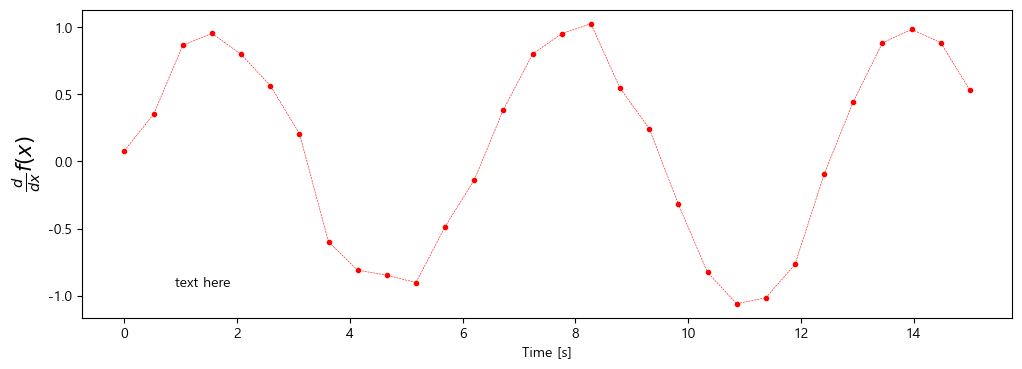

In [38]:
# 예제 1. fig, ax 단일 플롯 예제 - 순한 맛
x = np.linspace(0,15,30)
y = np.sin(x) + 0.1*np.random.randn(len(x))

fig, ax = plt.subplots(1, 1, figsize=(12,4))
ax.plot(x, y, 'o--', color='r', lw=0.4, ms=3)
ax.text(0.1, 0.1, 'text here', transform=ax.transAxes) # ax 내의 특정 위치에 텍스트 상자 생성
ax.set_xlabel('Time [s]')
ax.set_ylabel(r'$\frac{d}{dx} f(x)$', fontsize=15)
plt.show()

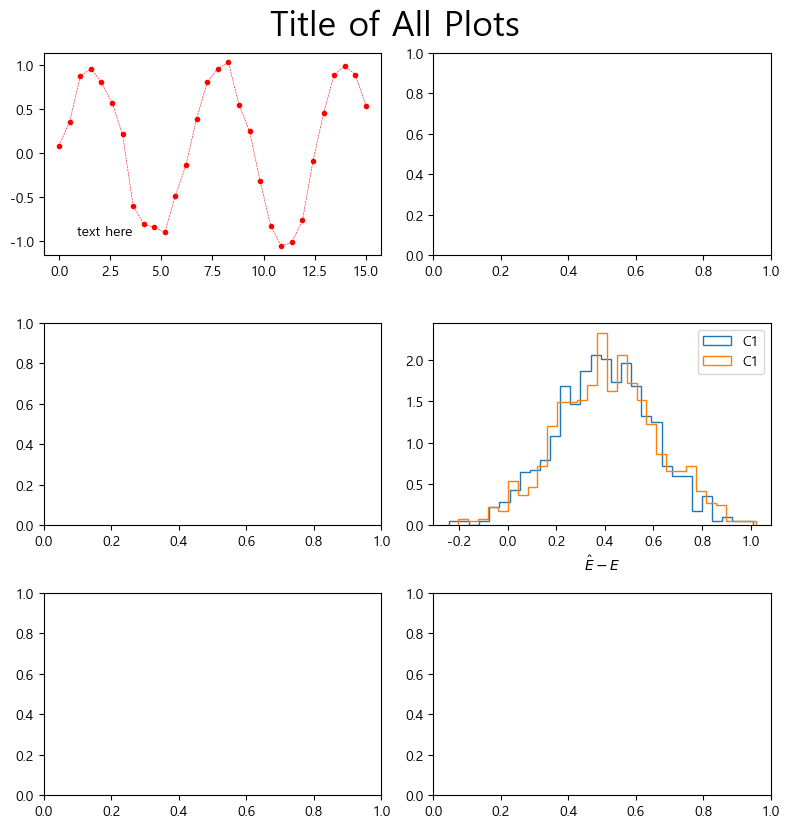

In [39]:
# 예제 2. 서브플롯 사용법 - 매운 맛
res = np.random.randn(1000)*0.2 + 0.4
res2 = np.random.randn(1000)*0.2 + 0.4

fig, axes = plt.subplots(3, 2, figsize=(8,8))
ax = axes[0][0]
ax.plot(x, y, 'o--', color='r', lw=0.4, ms=3)
ax.text(0.1, 0.1, 'text here', transform=ax.transAxes)
ax = axes[1][1]
ax.hist(res, bins=30, density=True, histtype='step', label='C1')
ax.hist(res2, bins=30, density=True, histtype='step', label='C1')
ax.set_xlabel('$\hat{E}-E$')
ax.legend()
fig.tight_layout() # 서브플롯 간 크기를 자동으로 조정해 서로 겹치지 않게 하는 메서드
fig.suptitle('Title of All Plots', y=1.03, fontsize=25) # 서브플롯 전체의 대제목
plt.show()

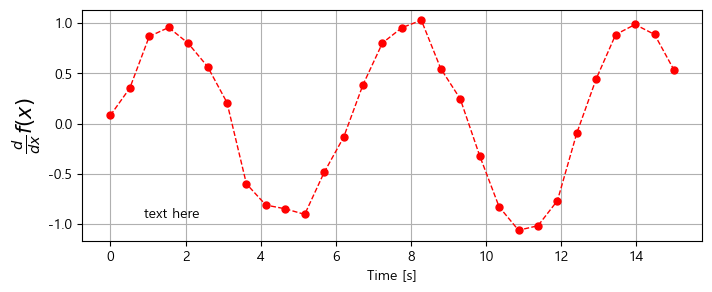

In [40]:
# 예제 3. 눈금 조정 - 약간 매운 맛
fig, ax = plt.subplots(1, 1, figsize=(8,3))
ax.plot(x, y, 'o--', color='r', lw=1, ms=5)
ax.text(0.1, 0.1, 'text here', transform=ax.transAxes)
ax.set_xlabel('Time [s]')
ax.set_ylabel(r'$\frac{d}{dx} f(x)$', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=10)
ax.grid()
plt.show()

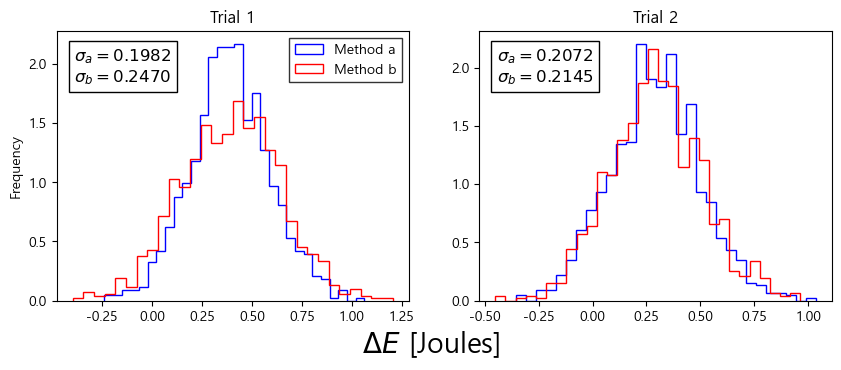

In [41]:
# 예제 4. 종합선물세트 - 핵X닭X음면
# 분석할 데이터 - 총 네 종류
res_a1 = 0.2*np.random.randn(1000)+0.4
res_b1 = 0.25*np.random.randn(1000)+0.4
res_a2 = 0.21*np.random.randn(1000)+0.3
res_b2 = 0.22*np.random.randn(1000)+0.3

# 축 레이블
# 복잡한 문자열은 미리 만들어서 정의해 두는 것이 좋습니다.
textstr1 = '\n'.join((
    r'$\sigma_a=%.4f$' % (np.std(res_a1)),
    r'$\sigma_b=%.4f$' % (np.std(res_b1))))

textstr2 = '\n'.join((
    r'$\sigma_a=%.4f$' % (np.std(res_a2)),
    r'$\sigma_b=%.4f$' % (np.std(res_b2))))

# 서브플롯 생성
fig, axes = plt.subplots(1, 2, figsize=(10,3.5))
ax = axes[0]
ax.hist(res_a1, bins=30, density=True, histtype='step', label='Method a', color='blue')
ax.hist(res_b1, bins=30, density=True, histtype='step', label='Method b', color='red')
ax.text(0.05, 0.81, textstr1, transform=ax.transAxes,
       bbox=dict(facecolor='white', edgecolor='black'), size=12) # 텍스트 상자

ax.legend(fontsize=10, fancybox=False, edgecolor='black') # 범례에 테두리 선 추가
ax.set_ylabel('Frequency')
ax.set_title('Trial 1')
ax = axes[1]
ax.hist(res_a2, bins=30, density=True, histtype='step', label='Method 1', color='blue')
ax.hist(res_b2, bins=30, density=True, histtype='step', label='Method 2', color='red')
ax.text(0.05, 0.81, textstr2, transform=ax.transAxes,
       bbox=dict(facecolor='white', edgecolor='black'), size=12)
ax.set_title('Trial 2')
fig.text(0.5, -0.04, '$\Delta E$ [Joules]', ha='center', size=20) # x축 데이터가 동일
plt.savefig('trial.png', dpi=200)
plt.show()

## 4.2 정적 3차원 플롯
사실 3차원 플롯을 사용할 분야는 그리 많지 않습니다. 그러나 컬럼이 다수 배치된 몇몇 데이터를 다룰 때는 그 복합적인 상관관계를 나타내기 위해 3차원 플롯이 필요합니다. 대개 3차원 플롯이 필요한 분야에서는 애니메이션 생성과 조합해서 사용하기도 합니다.  
### 4.2.1 3차원 플롯 생성
여기에서는 주가의 변동성 곡면과 유사한 플롯을 인위적으로 그려보겠습니다. 일단 다음과 같은 ETF가 있는 경우를 고려해보죠.
* 행사가는 50에서 150 사이
* 만기는 0.5년에서 2.5년 사이

이를 그리면 2차원 좌표 시스템이 됩니다. 넘파이의 `np.meshgrid()` 함수는 1차원 `ndarray` 객체 두 개에서 2차원 좌표를 생성합니다.

In [42]:
strike = np.linspace(50, 150, 24) # 행사가 값 ndarray 객체

In [43]:
ttm = np.linspace(0.5, 2.5, 24) # 만기 값 ndarray 객체

In [44]:
strike, ttm = np.meshgrid(strike, ttm) # (가짜) 내재 변동성 값

In [45]:
strike[:2].round(1)

array([[ 50. ,  54.3,  58.7,  63. ,  67.4,  71.7,  76.1,  80.4,  84.8,
         89.1,  93.5,  97.8, 102.2, 106.5, 110.9, 115.2, 119.6, 123.9,
        128.3, 132.6, 137. , 141.3, 145.7, 150. ],
       [ 50. ,  54.3,  58.7,  63. ,  67.4,  71.7,  76.1,  80.4,  84.8,
         89.1,  93.5,  97.8, 102.2, 106.5, 110.9, 115.2, 119.6, 123.9,
        128.3, 132.6, 137. , 141.3, 145.7, 150. ]])

In [46]:
iv = (strike - 100) ** 2 / (100 * strike) / ttm # 더미는 변동성 값 암시

In [47]:
iv[:5, :3]

array([[1.        , 0.76695652, 0.58132045],
       [0.85185185, 0.65333333, 0.4951989 ],
       [0.74193548, 0.56903226, 0.43130227],
       [0.65714286, 0.504     , 0.38201058],
       [0.58974359, 0.45230769, 0.34283001]])

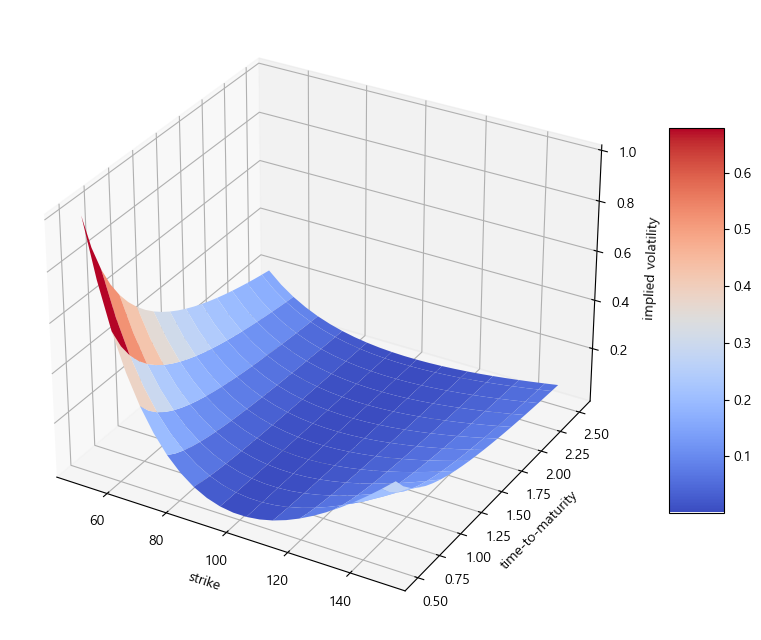

In [48]:
from mpl_toolkits.mplot3d import Axes3D # 3차원 플롯 기능 임포트. Axes3D는 직접 사용하지 않아도 임포트해야 합니다.
fig, ax = plt.subplots(subplot_kw={'projection': '3d'}, figsize=(10, 10)) # 3차원 플롯 캔버스 설정
surf = ax.plot_surface(strike, ttm, iv, rstride=2, cstride=2,
                       cmap=plt.cm.coolwarm, linewidth=0.5,
                       antialiased=True)
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')
fig.colorbar(surf, shrink=0.5, aspect=7)
plt.show()

아래 표는 `plot_surface` 함수의 인수 목록입니다.  

|인수|설명|
|---|---|
|`X`, `Y`, `Z`|2차원 배열 형식의 데이터 값|
|`rstride`|배열의 행 간격|
|`cstride`|배열의 열 간격|
|`color`|곡면 색깔|
|`cmap`|곡면에 사용될 컬러 맵|
|`facecolors`|개별 곡면 패치의 색|
|`norm`|값에서 색을 선택하는 데 사용되는 `Normalize` 객체|
|`vmin`|색으로 표시할 최소값|
|`vmax`|색으로 표시할 최대값|
|`shade`|그림자 표시 여부|   

2차원 플롯과 마찬가지로 라인 스타일은 점이나 삼각형 기호 등으로 대체할 수 있습니다. 아래 그림에서는 같은 자료를 3차원 스캐터플롯으로 표시하고 `view_init()` 함수를 사용하여 바라보는 각도를 변경했습니다.

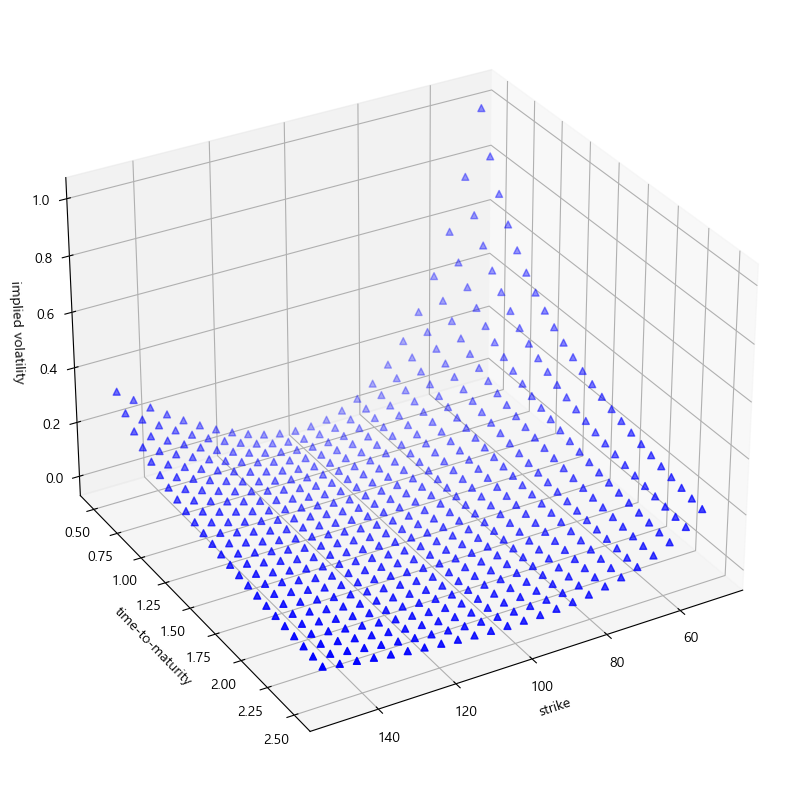

In [49]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 60) # 바라보는 각도 설정
ax.scatter(strike, ttm, iv, zdir='z', s=25,
           c='b', marker='^')
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')
plt.show()

### 4.2.2 애니메이션 생성
3D 플롯을 이용한 애니메이션 생성을 보기 전에, 일단은 다시 2차원 플롯으로 돌아가 어떻게 생성되는지를 알아보겠습니다. 3m/s의 속력으로 이동하는 $\sin$ 파동을 애니메이션으로 만드는 예제입니다.

In [50]:
# 함수 정의
def f(x,t):
    return np.sin(x-3*t)

In [51]:
x = np.linspace(0, 10*np.pi, 1000)
t = np.arange(0, 24, 1/60)
X, T = np.meshgrid(x, t)
F = f(X, T)

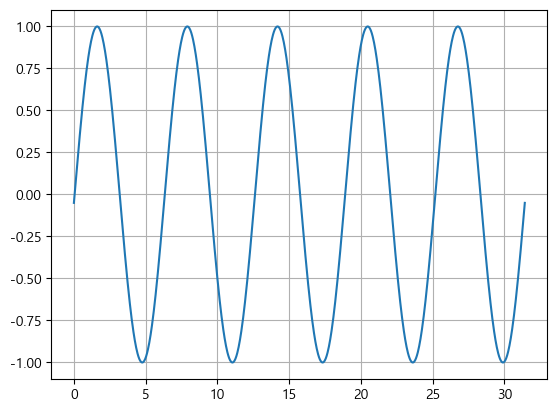

In [52]:
plt.plot(x, F[1])
plt.grid()
plt.show()

이제 이걸 애니메이션으로 만들겠습니다. 맷플롯립에는 애니메이션을 전문적으로 생성해주는 `animation` 서브패키지가 있습니다. 정밀하게 정의할 사항이 많기 때문에 1행 1열 서브플롯을 정의하고, 이 플롯 내에서 애니메이션을 생성해 gif 파일로 내보내겠습니다. 참고로 주피터 노트북과 VS Code 상에서는 파일이 생성되더라도 자동으로 재생되지 않기 때문에, 윈도우 탐색기로 파일이 저장된 폴더로 이동한 후에 알씨, 윈도우 사진 등의 프로그램을 통해서 열람하셔야 합니다.

In [53]:
from matplotlib import animation
from matplotlib.animation import PillowWriter

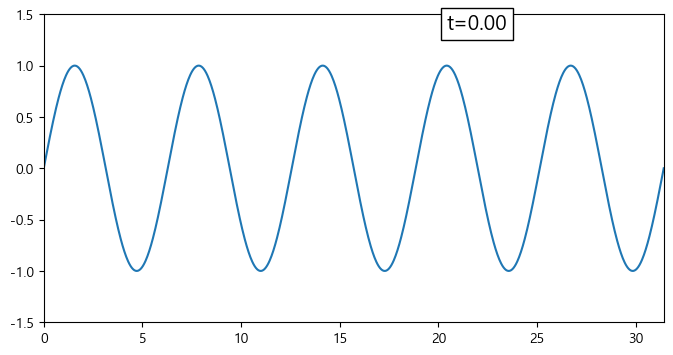

In [54]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
ln1, = plt.plot([], [])
time_text = ax.text(0.65, 0.95, '', fontsize=15,
                    bbox=dict(facecolor='white', edgecolor='black'), 
                    transform=ax.transAxes)
ax.set_xlim(0,10*np.pi)
ax.set_ylim(-1.5, 1.5)

def animate(i):
    ln1.set_data(x, F[i])
    time_text.set_text('t={:.2f}'.format(i/60))
    
ani = animation.FuncAnimation(fig, animate, frames=240, interval=50)
ani.save('ani.gif',writer='pillow',fps=50,dpi=100)

이제 회전하는 3D 표면을 만들어보겠습니다. 예제를 위해 아예 새롭게 평면 함수를 정의하고 시작하겠습니다. 생성되는 데 시간이 30초 이상 걸리니 차분하게 기다려주세요!

In [55]:
_ = np.linspace(-1, 1, 100)
x, y = np.meshgrid(_,_)
z = x ** 2 + x * y

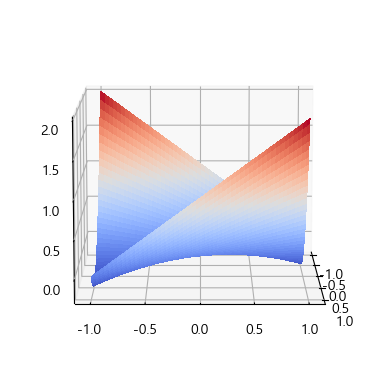

In [56]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_surface(x,y,z, cmap='coolwarm',
                       linewidth=0, antialiased=False)
ax.view_init(elev=10, azim=0)

def animate(i):
    ax.view_init(elev=10, azim=3*i)
    
ani = animation.FuncAnimation(fig, animate, frames=120, interval=50)
ani.save('ani2.gif',writer='pillow',fps=30,dpi=100)

## 4.3 상호작용형 2차원 플롯
맷플롯립을 사용하면 정적인 비트맵 객체나 pdf 형식의 플롯을 만들 수 있습니다. 최근에는 D3.js 표준에 기반한 상호작용형 플롯을 생성하는 라이브러리도 많습니다. 이러한 플롯을 사용하면 확대 및 축소, 데이터 조사를 위한 호버(hover) 효과 등이 가능합니다. 이런 플롯은 보통 웹페이지에 쉽게 넣을 수 있습니다.  
`plotly`는 인기 있는 플랫폼이자 플롯 라이브러리입니다. 데이터 과학 전용으로 데이터 과학 커뮤니티에서 널리 쓰입니다. 주요 장점은 파이썬 생태계와 밀접하게 통합되어 있고 특히 판다스 `DataFrame` 객체 및 `Cufflinks` 패키지와 쉽게 연동하여 쓸 수 있다는 접입니다.  
일부 기능을 사용하려면 무료 계정이 필요합니다. 일단 비밀번호를 인증하면 컴퓨터에 저장하여 영구적으로 사용할 수 있습니다. 자세한 내용은 "파이썬으로 plotly 시작하기" 안내서(https://plot.ly/python/getting-started/)를 참조하세요.  
이 절은 일부 기능에만 초점을 맞춥니다. 주로 `Cufflinks`를 사용하여 `DataFrame` 객체에 저장된 자료를 상호작용형 플롯으로 만듭니다.  
### 4.3.1 기본 플롯
주피터 노트북에서 사용하려면 몇 가지 임포트를 하고 노트북 모드를 켜야 합니다. `Cufflinks`도 먼저 설치하고 진행해주세요. 

> <span style='background-color:green'>Tips and Tricks</span></br>`plotly`를 사용하면 플롯을 `plotly` 서버에서 렌더링할 수 있는 옵션이 있습니다. 대량의 데이터를 사용할 때는 일반적으로 노트북 모드가 훨씬 빠릅니다. 하지만 스트리밍 서비스와 같은 특정 기능은 서버와 통신해야 사용할 수 있습니다. 즉, 인터넷 연결이 없으면 말짱 꽝입니다.  

이 예제도 난수를 사용합니다. 난수는 `DatetimeIndex`을 가진 `DataFrame` 객체(시계열 데이터)에 저장됩니다.

In [57]:
import pandas as pd
import plotly.offline as plyo # plotly의 오프라인 플롯 기능을 임포트

In [58]:
!pip install cufflinks

In [59]:
import cufflinks as cf # Cufflinks 임포트

In [60]:
plyo.init_notebook_mode(connected=True) # 노트북 모드 켜기

> <span style='background-color:green'>Tips and Tricks</span> 원격 렌더링과 로컬 렌더링</br>  `plotly`를 사용하면 플롯을 `plotly` 서버에서 렌더링할 수 있는 옵션이 있습니다. 하지만 대량의 데이터를 사용할 때는 일반적으로 노트북 모드가 훨씬 빠릅니다. 하지만 스트리밍 서비스와 같은 특정 기능은 서버와 통신해야 사용할 수 있습니다.  

이 예제도 난수를 사용합니다. 난수는 `DatetimeIndex`을 가진 `DataFrame` 객체(시계열 데이터)에 저장됩니다.

In [61]:
a = np.random.standard_normal((250, 5)).cumsum(axis=0)

In [62]:
index = pd.date_range('2019-1-1', # 객체 시작일
                      freq='B', # 평일 주기
                      periods=len(a)) # 필요한 주기 개수

In [63]:
df = pd.DataFrame(100 + 5 * a, # 원 데이터의 선형 변환
                  columns=list('abcde'), # 한 글자로 된 열 레이블
                  index=index) # DatetimeIndex 객체

In [64]:
df.head()

,a,b,c,d,e
2019-01-01,99.906490,99.413267,105.715625,94.226108,96.676959
2019-01-02,101.305169,96.076310,103.117577,93.239415,89.411910
2019-01-03,107.848374,91.252780,101.964500,85.636696,90.418947
2019-01-04,106.705637,85.704031,97.455747,81.050481,91.356224
2019-01-07,109.898790,91.566117,110.119523,71.670471,90.358373


`Cufflinks`는 `DataFrame` 클래스에 `df.iplot()` 메서드를 추가합니다. 이 메서드는 `plotly`를 백엔드로 써서 상호작용형 플롯을 만듭니다. 이 절의 모든 코드 예제는 상호작용형 플롯을 정적 비트맵으로 다운로드하는 옵션을 사용합니다. 이렇게 하면 글 사이에 그림을 넣을 수 있습니다. 주피터 노트북 환경에서 만들어진 그림은 모두 상호작용형입니다. 다음 코드로 만들어보죠.

In [65]:
# 오프라인(노트북 모드) 기능 사용
plyo.iplot(df.iplot(asFigure=True), # asFigure 인수로 df.iplot()를 호출하면 로컬 플롯 가능
           # image='png', # 이미지 옵션은 플롯의 정적 비트맵 버전도 제공합니다.
           filename='ply_01') # 저장할 비트맵의 파일 이름이 지정(파일 확장자는 자동으로 추가됨)

또한, 사용자가 바꿀 수 있는 다양한 옵션이 있습니다.

In [66]:
plyo.iplot(df[['a', 'b']].iplot(asFigure=True,
                                theme='polar', # 테마 (플롯 스타일) 변경
                                title='A Time Series Plot', # 제목 추가
                                xTitle='date', # x축 레이블 추가
                                yTitle='value', # y축 레이블 추가
                                mode={'a':'markers', 'b':'lines+markers'}, # 열별로 플롯 모드 정의
                                symbol={'a':'circle', 'b':'diamond'}, # 열별로 사용할 기호 정의
                                size=3.5, # 모든 기호의 크기를 고정
                                colors={'a':'blue', 'b':'magenta'}, # 열별로 사용할 색상 정의
                                ),
           # image='png',
           filename='ply_02')

맷플롯립과 유사하게 `plotly`도 다양한 플롯 유형을 제공합니다. 다음 코드의 결과를 라인이 아닌 히스토그램으로 나타내면 아래와 같습니다.

In [67]:
plyo.iplot(df.iplot(kind='hist',
                    subplots=True,
                    bins=15,
                    asFigure=True),
           filename='ply_03')

### 7.3.2 금융 플롯
`plotly`, `Cufflinks`, 맷플롯립을 조합하면 금융 시계열 데이터를 그리는 데 최고입니다. `Cufflinks`는 금융 플롯을 그리고 상대강도지수(Relative Strength Index, RSI)와 같은 금융 차트 요소를 추가하는 특수 기능을 제공합니다. 이를 위해 `Cufflinks`로 `DataFrame` 객체를 그릴 떄처럼 그림을 그릴 `QuantFig` 객체를 만듭니다. 여기에서는 실제 금융 데이터인 EUR/USD 환율 시계열 데이터를 사용합니다.

In [68]:
raw = pd.read_csv('fxcm_eur_usd_eod_data.csv', index_col=0, parse_dates=True)

In [69]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1547 entries, 2013-01-01 22:00:00 to 2017-12-31 22:00:00
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BidOpen   1547 non-null   float64
 1   BidHigh   1547 non-null   float64
 2   BidLow    1547 non-null   float64
 3   BidClose  1547 non-null   float64
 4   AskOpen   1547 non-null   float64
 5   AskHigh   1547 non-null   float64
 6   AskLow    1547 non-null   float64
 7   AskClose  1547 non-null   float64
dtypes: float64(8)
memory usage: 108.8 KB


In [70]:
quotes = raw[['AskOpen', 'AskHigh', 'AskLow', 'AskClose']] # DataFrame 객체에서 4개의 열을 골라냅니다(시|고|저|종, OHLC)
quotes = quotes.iloc[-60:] # 일부 데이터 행만 시각화에 사용
quotes.tail()

,AskOpen,AskHigh,AskLow,AskClose
2017-12-25 22:00:00,1.18667,1.18791,1.18467,1.18587
2017-12-26 22:00:00,1.18587,1.19104,1.18552,1.18885
2017-12-27 22:00:00,1.18885,1.19592,1.18885,1.19426
2017-12-28 22:00:00,1.19426,1.20256,1.19369,1.20092
2017-12-31 22:00:00,1.20092,1.20144,1.19994,1.20144


초기화 과정에서 `QuantFig` 객체는 `DataFrame` 객체와 몇 가지 기본적인 사용자 인수를 받습니다. 그다음 `qf.iplot()` 메서드를 사용하여 `QuantFig` 객체 `qf`에 저장된 데이터를 플롯합니다.

In [71]:
qf = cf.QuantFig(
    quotes, # QuantFig 생성자에 DataFrame 객체를 넣습니다.
    title='EUR/RSD Exchange Rate',
    legend='top',
    name='EUR/USD' # 데이터 집합 이름
    )

In [72]:
plyo.iplot(
    qf.iplot(asFigure=True),
    # image = 'png',
    filename='qf_01'
)

`QuantFig` 객체에 있는 다양한 메서드를 사용하여 볼린저 밴드(Bollinger bands)와 같은 차트 요소를 추가합니다.

In [73]:
qf.add_bollinger_bands(periods=15, # 볼린저 밴드 기간 지정
                       boll_std=2) # 볼린저 밴드 표준편차 지정

In [74]:
plyo.iplot(qf.iplot(asFigure=True),
           # image = 'png',
           filename='qf_02')

RSI와 같은 금융지표는 서브플롯으로 추가합니다.

In [75]:
qf.add_rsi(periods=14, # RSI 기간 변수 설정
           showbands=False) # 위아래 밴드 미표시 설정

In [76]:
plyo.iplot(qf.iplot(asFigure=True),
           # image='png',
           filename='qf_03')